**SleepInc**, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. Here is the analysis of the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality.

In [44]:
import pandas as pd
sleep_health = pd.read_csv('sleep_health_data.csv')
sleep_health.head(5)
sleep_health.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

## Average sleep duration for each occupation

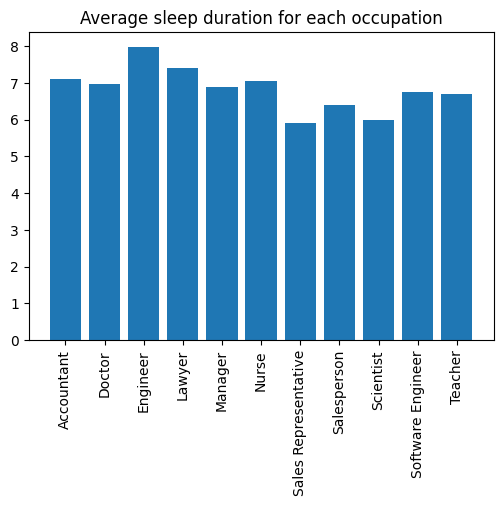

In [45]:
import matplotlib.pyplot as plt

sleep_occ = sleep_health.groupby('Occupation')['Sleep Duration'].mean().reset_index()

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(sleep_occ['Occupation'], sleep_occ['Sleep Duration'])
ax.set(title='Average sleep duration for each occupation')
ax.tick_params(axis='x', rotation=90)

## Relationship between sleep duration and sleep quality

In [46]:
# The occupation with the lowest average sleep duration
lowest_sleep_record = sleep_occ[sleep_occ['Sleep Duration'] == sleep_occ['Sleep Duration'].min()]
lowest_sleep_occ = lowest_sleep_record['Occupation'].values[0]
print(f'Occupation with the lowest average sleep duration: {lowest_sleep_occ}')

Occupation with the lowest average sleep duration: Sales Representative


In [47]:
# The occupation with the lowest average sleep quality
sleep_quality = sleep_health.groupby('Occupation')['Quality of Sleep'].mean().reset_index()

lowest_sleep_quality_rec = sleep_quality[sleep_quality['Quality of Sleep'] == sleep_quality['Quality of Sleep'].min()]
lowest_sleep_quality_occ = lowest_sleep_quality_rec['Occupation'].values[0]

print(f'Occupation with the lowest average sleep quality: {lowest_sleep_quality_occ}')
same_occ = True if lowest_sleep_occ == lowest_sleep_quality_occ else False
print(same_occ)

Occupation with the lowest average sleep quality: Sales Representative
True


The Sales representative occupation has the lowest average sleep duration and quality too.

[Text(0.5, 1.0, 'Sleep duration and quality of sleep'),
 Text(0.5, 0, 'sleep duration'),
 Text(0, 0.5, 'sleep quality')]

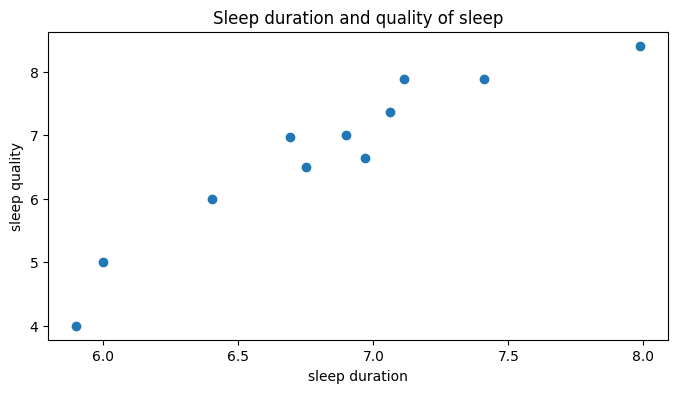

In [48]:
fig, ax = plt.subplots(figsize=(8,4))
scatter = ax.scatter(x = sleep_occ['Sleep Duration'], y = sleep_quality['Quality of Sleep'])
ax.set(title='Sleep duration and quality of sleep', xlabel='sleep duration', ylabel='sleep quality')

In [49]:
bmi_key = sleep_health['BMI Category'].unique()

norm_insomnia = sleep_health[(sleep_health['BMI Category'] =='Normal') & (sleep_health['Sleep Disorder']== 'Insomnia')].shape[0] / sleep_health[sleep_health['BMI Category'] =='Normal'].shape[0]

overweight_insomnia = sleep_health[(sleep_health['BMI Category'] =='Overweight') & (sleep_health['Sleep Disorder']== 'Insomnia')].shape[0] / sleep_health[sleep_health['BMI Category'] =='Overweight'].shape[0]

obese_insomnia = sleep_health[(sleep_health['BMI Category'] =='Obese') & (sleep_health['Sleep Disorder']== 'Insomnia')].shape[0] / sleep_health[sleep_health['BMI Category'] =='Obese'].shape[0]

bmi_insomnia_ratios = {
    'Normal':round(norm_insomnia, 2),
    'Overweight': round(overweight_insomnia, 2),
    'Obese': round(obese_insomnia, 2)    
}
print(bmi_insomnia_ratios)

{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}


[Text(0.5, 1.0, 'Insomnia Ratios Based on BMI Category')]

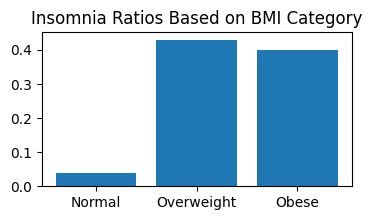

In [52]:
fig, ax= plt.subplots(figsize=(4,2))
ax.bar(bmi_insomnia_ratios.keys(), bmi_insomnia_ratios.values())
ax.set(title = 'Insomnia Ratios Based on BMI Category')